In [15]:
import numpy as np

lc = np.genfromtxt("data/PG1302_CRTS.dat", names="mjd, mag, magerr", delimiter=",", skip_header=1)
t = lc["mjd"] - 53496
mag = lc["mag"]
magerr = lc['magerr']

m = np.vstack((t, mag)).T

#print(str(m[:10]))
np.savetxt("data/PG1302_CRTS_REDFIT.dat", m, delimiter="\t")


Strongest signal: 16.6212
at freq(1/d):     0.0007
at period(d):     1478.0830


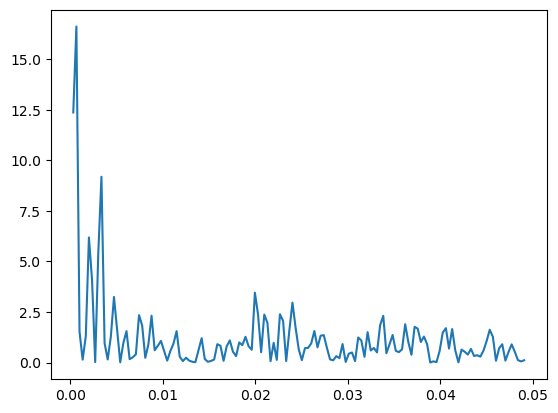

In [35]:
import matplotlib.pyplot as plt

analysis = np.genfromtxt("PG1302_CRTS.red.edited.txt", names="Freq, Gxx, Gxx_corr, Gred_th, Gred, CorrFac, 80pct_Chi2, 90pct_Chi2, 95pct_Chi2, 99pct_Chi2", delimiter="  ", skip_header=1)
#print(str(analysis[:10]))
freq = analysis["Freq"]
gxx = analysis["Gxx"]
k = np.unravel_index(np.argmax(gxx), gxx.shape)
print('Strongest signal: {0:.4f}'.format(gxx[k]))
print('at freq(1/d):     {0:.4f}'.format(freq[k]))
print('at period(d):     {0:.4f}'.format(1/freq[k]))

plt.plot(analysis["Freq"], analysis["Gxx"])
plt.show()